# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In [62]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [63]:
#Necessary libraries = Pandas, fbprophet and plotly
#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
!pip install prophet

In [65]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [66]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [67]:
df = pd.read_csv('TSLA.csv')

In [68]:
#read_csv function from pandas

In [69]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-02,21.896000,23.332666,21.544001,23.302668,23.302668,348225000
1,2018-08-03,23.187332,23.666668,22.835333,23.211332,23.211332,204847500
2,2018-08-06,23.030666,23.665333,22.788000,22.799334,22.799334,128464500
3,2018-08-07,22.922667,25.830667,22.610001,25.304667,25.304667,463137000
4,2018-08-08,24.606001,25.509333,24.474667,24.689333,24.689333,368568000
...,...,...,...,...,...,...,...
1252,2023-07-26,263.250000,268.040009,261.750000,264.350006,264.350006,95856200
1253,2023-07-27,268.309998,269.130005,255.300003,255.710007,255.710007,103697300
1254,2023-07-28,259.859985,267.250000,258.230011,266.440002,266.440002,111446000
1255,2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [71]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,152.612338,156.127646,148.795918,152.555758,152.555758,1.365811e+08
std,113.334369,115.839168,110.489634,113.171991,113.171991,8.889661e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,23.187332,23.543333,22.900000,23.256001,23.256001,7.911180e+07
50%,167.833328,173.800003,164.550003,167.979996,167.979996,1.094400e+08
75%,244.083328,248.259995,238.486664,243.389999,243.389999,1.656112e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [72]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [73]:
px.area(df, x='Date', y='Close')

In [74]:
px.area(df, x='Date', y='Volume')

In [75]:
px.bar(df, y='Volume')

In [76]:
px.box(df, y='Close')

# Understanding Facebook Prophet

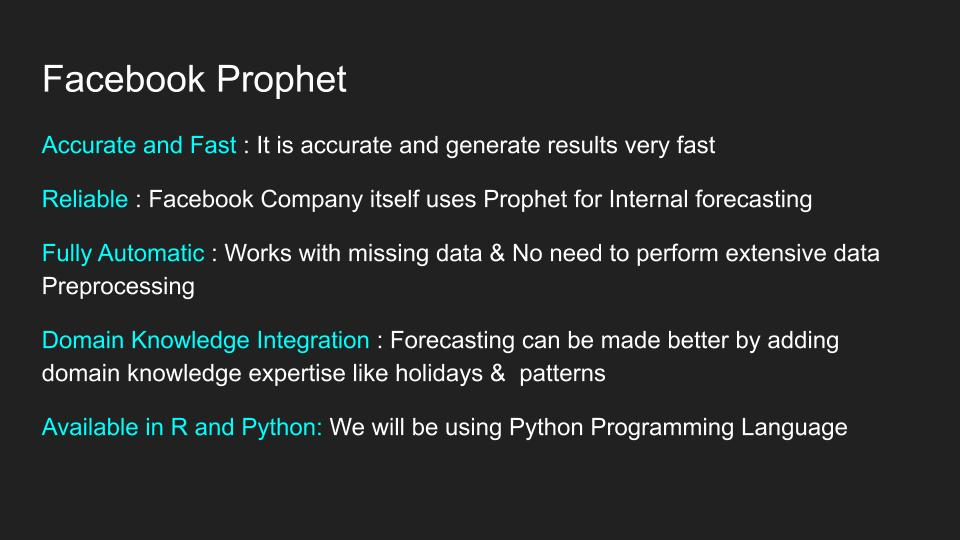

## Data Preperation

In [77]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-02,21.896000,23.332666,21.544001,23.302668,23.302668,348225000
1,2018-08-03,23.187332,23.666668,22.835333,23.211332,23.211332,204847500
2,2018-08-06,23.030666,23.665333,22.788000,22.799334,22.799334,128464500
3,2018-08-07,22.922667,25.830667,22.610001,25.304667,25.304667,463137000
4,2018-08-08,24.606001,25.509333,24.474667,24.689333,24.689333,368568000
...,...,...,...,...,...,...,...
1252,2023-07-26,263.250000,268.040009,261.750000,264.350006,264.350006,95856200
1253,2023-07-27,268.309998,269.130005,255.300003,255.710007,255.710007,103697300
1254,2023-07-28,259.859985,267.250000,258.230011,266.440002,266.440002,111446000
1255,2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200


In [78]:
columns = ['Date', 'Close']
ndf = pd.DataFrame(df, columns=columns)
ndf

,Date,Close
0,2018-08-02,23.302668
1,2018-08-03,23.211332
2,2018-08-06,22.799334
3,2018-08-07,25.304667
4,2018-08-08,24.689333
...,...,...
1252,2023-07-26,264.350006
1253,2023-07-27,255.710007
1254,2023-07-28,266.440002
1255,2023-07-31,267.429993


In [79]:
prophet_df = ndf.rename(columns={'Date':'ds', 'Close':'y'})
prophet_df

,ds,y
0,2018-08-02,23.302668
1,2018-08-03,23.211332
2,2018-08-06,22.799334
3,2018-08-07,25.304667
4,2018-08-08,24.689333
...,...,...
1252,2023-07-26,264.350006
1253,2023-07-27,255.710007
1254,2023-07-28,266.440002
1255,2023-07-31,267.429993


## Creating Facebook Prophet Model

In [80]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ld4lupt/3oe3jtq_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ld4lupt/3d76xyu6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4463', 'data', 'file=/tmp/tmp9ld4lupt/3oe3jtq_.json', 'init=/tmp/tmp9ld4lupt/3d76xyu6.json', 'output', 'file=/tmp/tmp9ld4lupt/prophet_model81m7faif/prophet_model-20230802072334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [81]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-08-02,17.361205,-23.704693,62.283263,17.361205,17.361205,2.223603,2.223603,2.223603,-1.598313,-1.598313,-1.598313,3.821916,3.821916,3.821916,0.0,0.0,0.0,19.584808
1,2018-08-03,17.370762,-24.331715,59.109703,17.370762,17.370762,1.543399,1.543399,1.543399,-2.040173,-2.040173,-2.040173,3.583573,3.583573,3.583573,0.0,0.0,0.0,18.914161
2,2018-08-06,17.399433,-21.319992,60.313908,17.399433,17.399433,3.310149,3.310149,3.310149,0.175769,0.175769,0.175769,3.134380,3.134380,3.134380,0.0,0.0,0.0,20.709583
3,2018-08-07,17.408990,-22.699806,64.561298,17.408990,17.408990,1.736906,1.736906,1.736906,-1.325303,-1.325303,-1.325303,3.062209,3.062209,3.062209,0.0,0.0,0.0,19.145896
4,2018-08-08,17.418548,-22.239465,62.371147,17.418548,17.418548,1.951744,1.951744,1.951744,-1.068575,-1.068575,-1.068575,3.020319,3.020319,3.020319,0.0,0.0,0.0,19.370291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,2023-08-27,180.229849,142.805163,232.257834,179.900757,180.537405,5.040313,5.040313,5.040313,2.928298,2.928298,2.928298,2.112014,2.112014,2.112014,0.0,0.0,0.0,185.270161
1283,2023-08-28,180.047072,139.059684,224.094302,179.646368,180.394753,2.270259,2.270259,2.270259,0.175769,0.175769,0.175769,2.094490,2.094490,2.094490,0.0,0.0,0.0,182.317331
1284,2023-08-29,179.864295,137.738705,225.143891,179.436138,180.245595,0.790351,0.790351,0.790351,-1.325303,-1.325303,-1.325303,2.115654,2.115654,2.115654,0.0,0.0,0.0,180.654646
1285,2023-08-30,179.681518,135.759686,225.012372,179.215745,180.107143,1.112057,1.112057,1.112057,-1.068575,-1.068575,-1.068575,2.180632,2.180632,2.180632,0.0,0.0,0.0,180.793575


In [82]:
px.line(forecast, x='ds',y='yhat' )

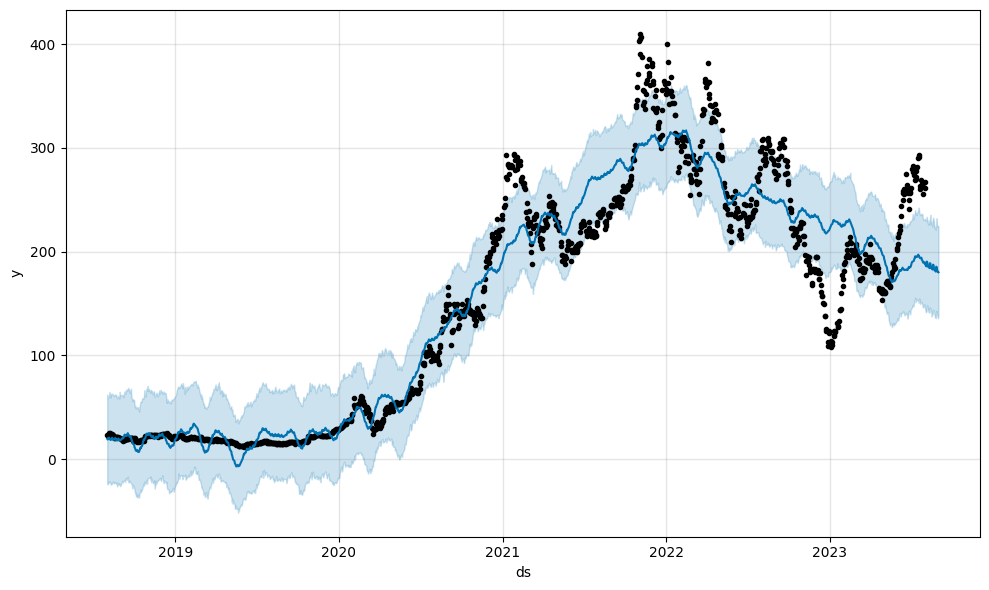

In [83]:
figure = m.plot(forecast)

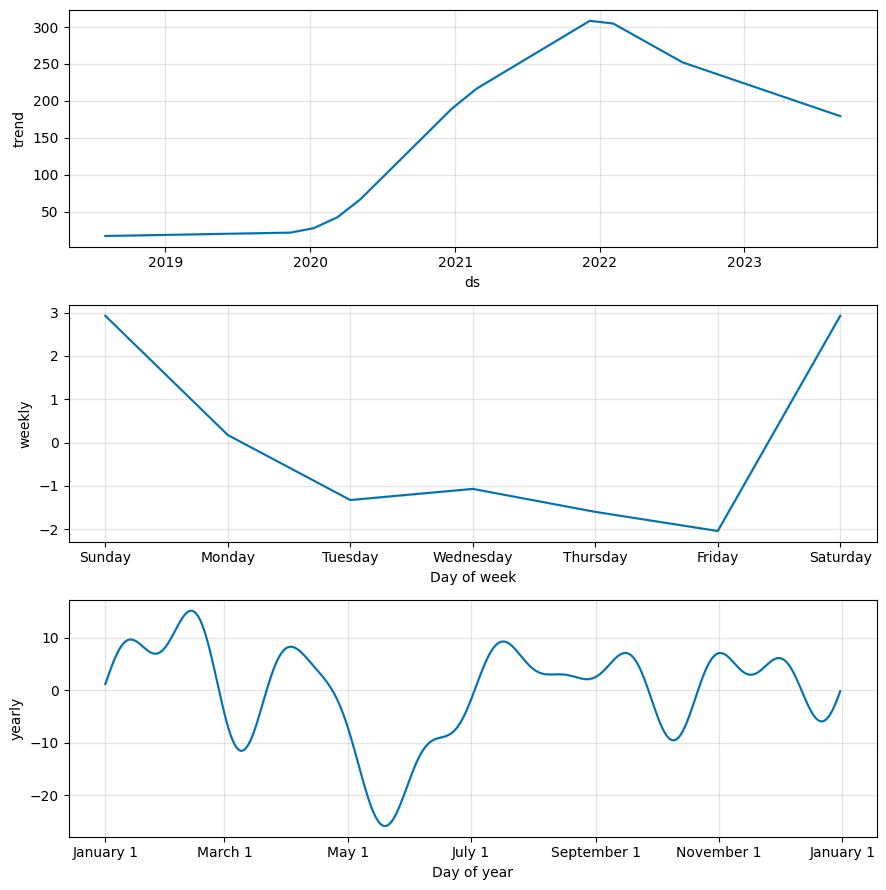

In [84]:
figure2 = m.plot_components(forecast)

In [85]:
from prophet.plot import plot_plotly, plot_components_plotly

In [89]:
plot_plotly(m, forecast)

In [87]:
plot_components_plotly(m, forecast)

##Downloading the Forecast data

In [88]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>